In [1]:
from mygene import MyGeneInfo as mg
from matplotlib_venn import venn2,venn3

In [2]:
gtex = pd.read_csv('/Users/anmol_gorakshakar/Downloads/gtex_v8', sep = '\t', skiprows=2)

In [4]:
base = [f'https://en.wikipedia.org/wiki/List_of_human_protein-coding_genes_{i}' for i in range(1,5)]
prot_coding_genes = [pd.read_html(i)[1] for i in base]
prot_coding_genes = pd.concat(prot_coding_genes)
prot_coding_genes = prot_coding_genes[[*prot_coding_genes][1:]].reset_index(drop=True).drop('HGNC ID',
                                          axis=1).rename(columns={'UniProt ID(s)':'uniprot_id',
                                                                  'Gene symbol':'gene_symbol'})

In [6]:
prot_exp = pd.read_csv('/Users/anmol_gorakshakar/google_drive/datasets/human_proteome_map/HPM_protein_level_expression_matrix_Kim_et_al_052914.csv')
cols = ['RefSeq Accession']
cols.extend([i for i in prot_exp if 'Adult ' in i])
prot_exp = prot_exp[cols]
prot_exp.columns = [i.lower().split('adult ')[1].replace(' ','_')  
                         if 'Adult ' in i 
                         else i.lower().replace(' ','_') 
                     for i in prot_exp]
del cols
prot_exp.refseq_accession=prot_exp.apply(lambda x: 
                                             x['refseq_accession'].split('.')[0] 
                                                 if type(x['refseq_accession'])==str 
                                                 else np.nan,
                                         axis=1)
prot_exp=prot_exp.rename(columns={'refseq_accession':'refseq_id'})

In [7]:
prot_exp

,refseq_id,adrenal,colon,esophagus,frontal_cortex,gallbladder,heart,kidney,liver,lung,ovary,pancreas,prostate,rectum,retina,spinal_cord,testis,urinary_bladder
0,NP_001035529,3.109941,1.540571,0.000000,46.629018,0.000000,0.000000,0.000000,2.546642,0.000000,9.355521,4.385976,0.000000,1.628962,17.159163,15.952460,22.950519,1.241875
1,NP_000445,120.921086,58.131277,71.627964,54.533857,55.623412,71.021051,226.535778,158.748109,78.604118,42.953347,66.160459,60.783913,66.396216,113.641458,106.143568,73.068023,57.073355
2,NP_006348,8.160687,3.624654,0.000000,5.640977,5.878204,3.438551,6.271455,2.429083,1.614372,11.151550,5.100527,1.799324,1.321126,9.278885,4.008683,9.307239,3.679863
3,NP_598014,21.399488,52.195766,39.849876,0.000000,23.683595,7.706672,5.944454,4.109577,21.300278,45.868095,26.710536,22.685609,27.410163,0.000000,10.108239,18.328529,30.304916
4,NP_683699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30052,NP_001240766,1.392672,1.427184,0.000000,1.295562,0.000000,1.631353,0.000000,2.546642,1.614372,3.557190,1.429102,2.294936,1.321126,1.895982,2.337688,2.131454,1.817050
30053,NP_001017530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350031,0.000000
30054,NP_001156896,0.000000,0.000000,2.111652,0.000000,0.000000,2.335074,2.371489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30055,NP_008945,6.963362,0.000000,0.000000,9.346120,0.000000,3.129930,2.371489,1.273321,1.614372,2.152118,2.242323,1.303713,0.000000,5.047190,3.341989,2.700061,0.000000


In [8]:
refseq_info = mg().querymany(prot_exp.refseq_id, 
                             scopes='refseq', 
                             fields='symbol,name,uniprot',
                             species=9606,
                             as_dataframe=True)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-30057...done.
Finished.
1176 input query terms found no hit:
	['XP_003403669', 'XP_001131322', 'XP_003403476', 'XP_003119377', 'XP_001127

In [9]:
refseq_info=refseq_info.rename_axis(
                        'refseq_id').reset_index()[['refseq_id',
                                                     'name',
                                                     'symbol',
                                                     'uniprot.Swiss-Prot']].rename(
                                        columns={'uniprot.Swiss-Prot':'uniprot_id',
                                                 'symbol':'gene_symbol'
                                                })

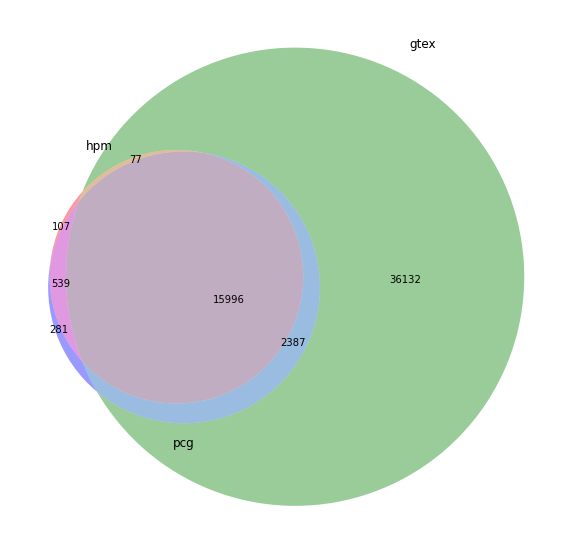

In [10]:
f,ax = plt.subplots(figsize=(10,10))
venn3([set(refseq_info.gene_symbol),
       set(gtex.Description),
       set(prot_coding_genes.gene_symbol)],
     set_labels=['hpm','gtex','pcg'],ax=ax
     )

In [12]:
def data_generator():
    gene = np.random.choice(refseq_info.gene_symbol)
    print(gene)
    data = prot_exp.merge(refseq_info[refseq_info.gene_symbol==gene].refseq_id, 
                   on ='refseq_id').set_index('refseq_id')
    return data

data = data_generator()
    
print(gene, data.shape, '\n', data)
plt.figure(figsize=(20,7))
sns.violinplot(data = data , 
               width=1)
plt.tick_params(labelrotation=90)
    

PKD2L1


NameError: name 'gene' is not defined

In [13]:
prot_exp.melt(id_vars='refseq_id',
              var_name='tissue',
              value_name='expression'
             )

,refseq_id,tissue,expression
0,NP_001035529,adrenal,3.109941
1,NP_000445,adrenal,120.921086
2,NP_006348,adrenal,8.160687
3,NP_598014,adrenal,21.399488
4,NP_683699,adrenal,0.000000
...,...,...,...
510964,NP_001240766,urinary_bladder,1.817050
510965,NP_001017530,urinary_bladder,0.000000
510966,NP_001156896,urinary_bladder,0.000000
510967,NP_008945,urinary_bladder,0.000000


In [14]:
gtex_info = mg().querymany(gtex.Description, 
                             scopes='symbol', 
                             fields='name,uniprot',
                             species=9606,
                             as_dataframe=True)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [106]:
gtex_info = gtex_info.rename_axis('gene_symbol').reset_index().rename(columns = {'uniprot.Swiss-Prot':'uniprot_id'})[[
    'gene_symbol','name','uniprot_id'
]]

In [111]:
tmp = gtex_info.dropna(subset=['uniprot_id'])

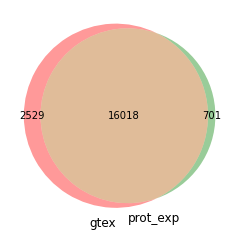

In [125]:
venn2([set(tmp.gene_symbol),
       set(prot_exp.merge(refseq_info, on='refseq_id').gene_symbol)
      ], set_labels=['gtex','prot_exp'])

In [132]:
refseq_info.merge(gtex_info[['gene_symbol']], on='gene_symbol', how='outer')

,refseq_id,name,gene_symbol,uniprot_id
0,NP_001035529,mitogen-activated protein kinase 8 interacting...,MAPK8IP3,Q9UPT6
1,NP_055948,mitogen-activated protein kinase 8 interacting...,MAPK8IP3,Q9UPT6
2,NP_000445,superoxide dismutase 1,SOD1,P00441
3,NP_006348,ubiquitin conjugating enzyme E2 E3,UBE2E3,Q969T4
4,NP_872619,ubiquitin conjugating enzyme E2 E3,UBE2E3,Q969T4
...,...,...,...,...
94147,NaN,NaN,MT-ND6,NaN
94148,NaN,NaN,MT-TE,NaN
94149,NaN,NaN,MT-CYB,NaN
94150,NaN,NaN,MT-TT,NaN


In [135]:
refseq_info[['refseq_id','gene_symbol']].drop_duplicates()

,refseq_id,gene_symbol
0,NP_001035529,MAPK8IP3
1,NP_000445,SOD1
2,NP_006348,UBE2E3
3,NP_598014,DCN
4,NP_683699,TNFRSF18
...,...,...
30052,NP_001240766,PKD2L1
30053,NP_001017530,PRR5
30054,NP_001156896,COPS9
30055,NP_008945,WWP2


In [178]:
uniprot_id_list = refseq_info[['gene_symbol',
             'uniprot_id']].apply(lambda x: 
                                  [x['gene_symbol'], x['uniprot_id']] 
                                      if type(x['uniprot_id'])==list 
                                      else np.nan, axis=1).dropna()
unique_uniprots = []
for record in refseq_info.to_records():
    if type(record.uniprot_id) == list:
        uniprots = record.uniprot_id
        for uniprot in uniprots:
            unique_uniprots.append([record['gene_symbol'], uniprot])
            
uniprot_df_prot_exp = pd.concat([refseq_info[['gene_symbol',
             'uniprot_id']].apply(lambda x: 
                                  x if type(x['uniprot_id'])!=list 
                                      else np.nan, axis=1).dropna(), 
                        pd.DataFrame(unique_uniprots, 
                                     columns = ['gene_symbol',
                                                'uniprot_id'])]).drop_duplicates()

In [179]:
uniprot_df_prot_exp

,gene_symbol,uniprot_id
0,MAPK8IP3,Q9UPT6
1,SOD1,P00441
2,UBE2E3,Q969T4
3,DCN,P07585
4,TNFRSF18,Q9Y5U5
...,...,...
406,CALM2,P0DP25
409,GAGE12F,P0CL80
410,GAGE12F,O76087
411,GAGE12F,P0CL81


In [184]:
uniprot_id_list = gtex_info[['gene_symbol',
             'uniprot_id']].apply(lambda x: 
                                  [x['gene_symbol'], x['uniprot_id']] 
                                      if type(x['uniprot_id'])==list 
                                      else np.nan, axis=1).dropna()
unique_uniprots = []
for record in gtex_info.to_records():
    if type(record.uniprot_id) == list:
        uniprots = record.uniprot_id
        for uniprot in uniprots:
            unique_uniprots.append([record['gene_symbol'], uniprot])
            
uniprot_df_gtex = pd.concat([gtex_info[['gene_symbol',
             'uniprot_id']].apply(lambda x: 
                                  x if type(x['uniprot_id'])!=list 
                                      else np.nan, axis=1).dropna(), 
                        pd.DataFrame(unique_uniprots, 
                                     columns = ['gene_symbol',
                                                'uniprot_id'])]).drop_duplicates()

,gene_symbol,uniprot_id
10,OR4F5,Q8NH21
32,OR4F29,Q6IEY1
64,OR4F16,Q6IEY1
85,SAMD11,Q96NU1
86,NOC2L,Q9Y3T9
...,...,...
79968,BPY2C,O14599
80007,CDY1,Q9Y6F8
80093,SPRY3,O43610
80098,VAMP7,P51809


In [190]:
master_uniprot_df = uniprot_df_prot_exp.merge(uniprot_df_gtex, on=['gene_symbol','uniprot_id'], how = 'outer')

In [209]:
master_uniprot_df = pd.concat([master_uniprot_df, prot_coding_genes]).drop_duplicates()

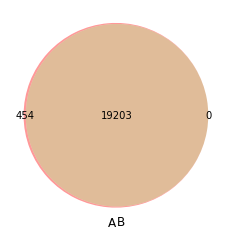

In [210]:
venn2([set(master_uniprot_df.gene_symbol), set(prot_coding_genes.gene_symbol)])

In [15]:
gtex

,Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,ENSG00000223972.5,DDX11L1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.166403,0.000000,0.000000,0.000000,0.00000
1,ENSG00000227232.5,WASH7P,4.064030,3.371110,2.68549,4.04762,3.90076,3.639630,5.16375,1.43859,...,5.932980,6.13265,4.193780,5.926310,3.062480,4.702530,6.272550,7.190010,5.745540,2.64743
2,ENSG00000278267.1,MIR6859-1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.054223,0.000000,0.000000,0.000000,0.00000
4,ENSG00000237613.2,FAM138A,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,ENSG00000198695.2,MT-ND6,3517.220000,3598.090000,6637.79000,6374.49000,4972.73000,4635.000000,8275.20000,9631.77000,...,8919.460000,8113.22000,9764.490000,5477.360000,9628.750000,1676.590000,2520.410000,3644.000000,2237.430000,960.29100
56196,ENSG00000210194.1,MT-TE,11.903800,11.203400,24.41390,22.65940,20.58800,18.257600,27.50560,40.58860,...,32.932100,31.33400,35.456000,24.934900,33.496300,2.871770,5.795670,10.370100,5.724510,3.49736
56197,ENSG00000198727.2,MT-CYB,23839.100000,25511.700000,28799.40000,12919.40000,15943.20000,13051.500000,23663.20000,32931.80000,...,19058.200000,17223.10000,24521.300000,11578.600000,27193.100000,15337.800000,19868.500000,15025.000000,12803.400000,2305.49000
56198,ENSG00000210195.2,MT-TT,0.616205,0.697191,1.50928,0.00000,0.00000,0.544659,0.00000,3.44476,...,0.884701,1.11364,0.815455,0.783492,0.803858,0.443781,0.000000,0.000000,0.000000,0.00000


In [21]:
refseq_info[refseq_info.gene_symbol=='CACNA1G'].refseq_id

3117        NP_938194
3311     NP_001243262
4225        NP_938201
4350        NP_938198
5151     NP_001243290
8013     NP_001243256
9077     NP_001243261
10191       NP_061496
13517    NP_001243260
14085    NP_001243254
14976       NP_938192
15306       NP_938191
16799    NP_001243253
18316    NP_001243257
18400       NP_938202
18439    NP_001243259
18459    NP_001243263
18560       NP_938200
19199       NP_938406
20035       NP_938197
20568    NP_001243288
22039       NP_938199
22494       NP_938196
24638       NP_938193
27041    NP_001243255
27998       NP_938190
29145    NP_001243289
29955    NP_001243258
Name: refseq_id, dtype: object

,refseq_id,adrenal,colon,esophagus,frontal_cortex,gallbladder,heart,kidney,liver,lung,ovary,pancreas,prostate,rectum,retina,spinal_cord,testis,urinary_bladder
0,NP_001035529,3.109941,1.540571,0.000000,46.629018,0.000000,0.000000,0.000000,2.546642,0.000000,9.355521,4.385976,0.000000,1.628962,17.159163,15.952460,22.950519,1.241875
1,NP_000445,120.921086,58.131277,71.627964,54.533857,55.623412,71.021051,226.535778,158.748109,78.604118,42.953347,66.160459,60.783913,66.396216,113.641458,106.143568,73.068023,57.073355
2,NP_006348,8.160687,3.624654,0.000000,5.640977,5.878204,3.438551,6.271455,2.429083,1.614372,11.151550,5.100527,1.799324,1.321126,9.278885,4.008683,9.307239,3.679863
3,NP_598014,21.399488,52.195766,39.849876,0.000000,23.683595,7.706672,5.944454,4.109577,21.300278,45.868095,26.710536,22.685609,27.410163,0.000000,10.108239,18.328529,30.304916
4,NP_683699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30052,NP_001240766,1.392672,1.427184,0.000000,1.295562,0.000000,1.631353,0.000000,2.546642,1.614372,3.557190,1.429102,2.294936,1.321126,1.895982,2.337688,2.131454,1.817050
30053,NP_001017530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350031,0.000000
30054,NP_001156896,0.000000,0.000000,2.111652,0.000000,0.000000,2.335074,2.371489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30055,NP_008945,6.963362,0.000000,0.000000,9.346120,0.000000,3.129930,2.371489,1.273321,1.614372,2.152118,2.242323,1.303713,0.000000,5.047190,3.341989,2.700061,0.000000
